101


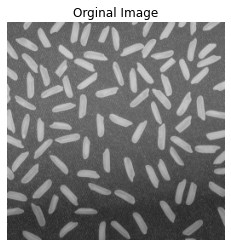

101


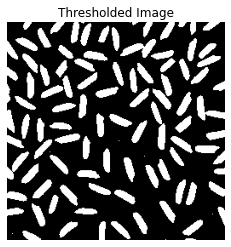

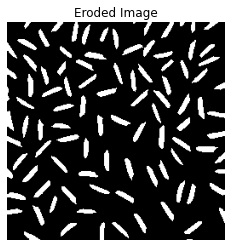

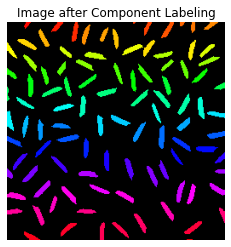

In [66]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


img = cv.imread('../Images/rice.png',cv.IMREAD_GRAYSCALE)
   
# Thresholding the Image to binary
binarized_img = cv.adaptiveThreshold(img, 255, 
cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 31, -20)
#Eroding
kernel = np.ones((3,3), np.uint8)
eroded_img = cv2.erode(binarized_img, kernel)
#computes the connected components labeled image of boolean image 
num_labels, list_labels = cv.connectedComponents(eroded_img, 4)
# Map component labels to hue in hsv color space
normal = cv2.normalize(list_labels.astype('float'), None,
0.0, 1.0, cv.NORM_MINMAX)
hue_labels = np.uint8(179*normal)
# Combining with saturation and value channels in hsv color space
blank = 255*np.ones_like(img)
hsv_labeled_img = cv.merge([hue_labels, blank, blank])
# Converting hsv to BGR
labeled_img = cv.cvtColor(hsv_labeled_img, cv.COLOR_HSV2RGB)   
# setting the background label to black
labeled_img[hue_labels==0] = 0
print(num_labels)


# Showing Original Image
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
print(num_labels)
plt.imshow(cv.cvtColor(binarized_img,cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Thresholded Image")
plt.show()
plt.imshow(cv.cvtColor(eroded_img,cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Eroded Image")
plt.show()
#Showing Image after Component Labeling
plt.imshow(labeled_img)
plt.axis('off')
plt.title("Image after Component Labeling")
plt.show()


101


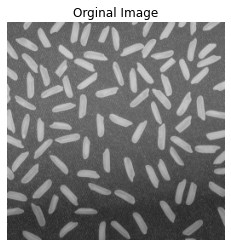

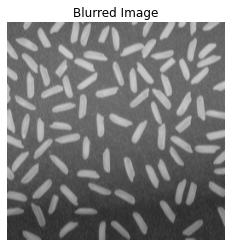

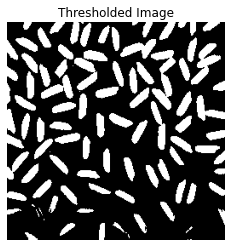

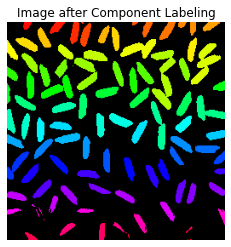

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('../Images/rice.png', cv.IMREAD_GRAYSCALE)
#Removal of noise  
blur = cv.GaussianBlur(img, (3,3), 0.35,0.35, cv.BORDER_REPLICATE)
#Thresholding   
thresh_val, binarized_img= cv.threshold(blur, 127, 255, cv.THRESH_BINARY)
#computes the connected components labeled image of boolean image 
num_labels, list_labels = cv.connectedComponents(binarized_img)
# Map component labels to hue in hsv color space
normal = cv.normalize(list_labels.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
hue_labels = np.uint8(179*normal)
# Combining with saturation and value channels in hsv color space
blank = 255*np.ones_like(img)
hsv_labeled_img = cv.merge([hue_labels, blank, blank])
# Converting hsv to BGR
labeled_img = cv.cvtColor(hsv_labeled_img, cv.COLOR_HSV2RGB)   
# setting the background label to black
labeled_img[hue_labels==0] = 0
print(num_labels)
# Showing Original Image
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Orginal Image")
plt.show()
# Showing Blurred Image
plt.imshow(cv.cvtColor(blur,cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Blurred Image")
plt.show()
# Showing the thresholded image
plt.imshow(cv.cvtColor(binarized_img,cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Thresholded Image")
plt.show()
#Showing Image after Component Labeling
plt.imshow(labeled_img)
plt.axis('off')
plt.title("Image after Component Labeling")
plt.show()


98 contour(s) found


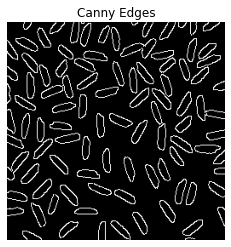

In [16]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('../Images/rice.png', cv.IMREAD_GRAYSCALE)

#Removal of noise  
blur = cv.GaussianBlur(img, (3,3), 0.35,0.35, cv.BORDER_REPLICATE)
#Getting the edges
img = cv.Canny(blur, 175, 200)
#Thresholding   
thresh_val, binarized_img= cv.threshold(img, 110, 255, cv.THRESH_BINARY)

contours, hierarchies = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
print(f'{len(contours)} contour(s) found')
# Showing the canny edged image
plt.imshow(cv.cvtColor(binarized_img,cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Canny Edges")
plt.show()
